# Proyek Analisis Data: Nama dataset

- Nama: Ahmad Ikhsan Maulana
- Email: ahmadikhsanmaulana10@gmail.com
- Id Dicoding: ahmadikhsanmaulana

# Menentukan Pertanyaan Bisnis

- Pada musim apakah sepeda memiliki jumlah sewa tertinggi?
- Bagaimana pengaruh cuaca terhadap pengguna bike sharing?
- Bagaimana tren penyewaan bike sharing dalam setiap jam, bulan, dan tahun?

# Menyiapkan Semua Library Yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Tool Pengolahan Data:

Library numpy => untuk komputasi numerik.

Library pandas => untuk memanipulasi dan menganalisis data.

- Tool Visualisasi Data:
  
Library matplotlib => untuk membuat sebuah figure.

Library seaborn => untuk visualisasi data yang atraktif dan informatif.

# Data Wrangling

## Gathering Data

### 1. Memuat tabel days_df

In [ ]:
days_df = pd.read_csv("dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


a. Mengubah nama judul kolom, mengubah yang angka (weather_condition, season, month, weekday) menjadi keterangan

In [ ]:
days_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'yr':'year'},inplace=True)

In [ ]:
days_df['weather_condition']= days_df['weather_condition'].map({1: 'Clear to partly cloudy', 2: 'Misty and cloudy',
                                                              3: 'Light rain or snow', 4: 'Heavy rain or snow'})

days_df['season']= days_df['season'].map({1:'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

days_df['year'] = days_df['year'].apply(lambda x: '2011' if x == 0 else('2012' if x == 1 else 'unknown'))

days_df['month']= days_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

days_df['weekday']= days_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

b. Menyesuaikan tipe data (category)

In [ ]:
# Mengubah tipe data datetime 
days_df['datetime'] = pd.to_datetime(days_df.datetime)

# Tipe data kategorikal
days_df['season'] = days_df.season.astype('category')
days_df['holiday'] = days_df.holiday.astype('category')
days_df['weekday'] = days_df.weekday.astype('category')
days_df['weather_condition'] = days_df.weather_condition.astype('category')
days_df['workingday'] = days_df.workingday.astype('category')
days_df['month'] = days_df.month.astype('category')
days_df['year'] = days_df.year.astype('category')

days_df.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty and cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty and cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear to partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear to partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear to partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2. Memuat tabel hours_df

In [ ]:
hours_df = pd.read_csv("dataset/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


a. Mengubah nama judul kolom, mengubah yang angka (weather_condition, season, month, weekday) menjadi keterangan

In [ ]:
hours_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'yr':'year',
                        'hr':'hour'},inplace=True)

In [ ]:
hours_df['weather_condition']= hours_df['weather_condition'].map({1: 'Clear to partly cloudy', 2: 'Misty and cloudy',
                                                              3: 'Light rain or snow', 4: 'Heavy rain or snow'})

hours_df['season']= hours_df['season'].map({1:'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

hours_df['year'] = hours_df['year'].apply(lambda x: '2011' if x == 0 else('2012' if x == 1 else 'unknown'))

hours_df['month']= hours_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

hours_df['weekday']= hours_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

b. Menyesuaikan tipe data (category)

In [ ]:
# Mengubah tipe data datetime 
hours_df['datetime'] = pd.to_datetime(hours_df.datetime)

# Tipe data kategorikal
hours_df['season'] = hours_df.season.astype('category')
hours_df['holiday'] = hours_df.holiday.astype('category')
hours_df['weekday'] = hours_df.weekday.astype('category')
hours_df['weather_condition'] = hours_df.weather_condition.astype('category')
hours_df['workingday'] = hours_df.workingday.astype('category')
hours_df['month'] = hours_df.month.astype('category')
hours_df['year'] = hours_df.year.astype('category')

hours_df.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear to partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear to partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear to partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear to partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear to partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

### 1. Menilai data days_df

a. Mengecek tipe data

In [ ]:
print("Tipe data tabel days_df:\n")
days_df.info()

Tipe data tabel days_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int6

b. Mengecek missing value

In [ ]:
print("Jumlah Missing Value:\n", days_df.isna().sum())

Jumlah Missing Value:
 instant              0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
dtype: int64


c. Mengecek duplikasi data

In [ ]:
print("Jumlah Duplikasi Data:\n", days_df.duplicated().sum())

Jumlah Duplikasi Data:
 0


d. Mengecek Parameter Statistik

In [ ]:
print("Parameter Statistik days_df:\n")
days_df.describe()

Parameter Statistik days_df:



,instant,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### 2. Menilai data hours_df

a. Mengecek tipe data

In [ ]:
print("Tipe data tabel hours_df:\n")
hours_df.info()

Tipe data tabel hours_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   workingday         17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null 

b. Mengecek missing value

In [ ]:
print("Jumlah Missing Value:\n", hours_df.isna().sum())

Jumlah Missing Value:
 instant              0
datetime             0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
dtype: int64


c. Mengecek Duplikasi Data

In [ ]:
print("Jumlah Duplikasi Data:\n", hours_df.duplicated().sum())

Jumlah Duplikasi Data:
 0


d. Mengecek Parameter Statistik

In [ ]:
print("Parameter Statistik days_df:\n")
hours_df.describe()

Parameter Statistik days_df:



,instant,datetime,hour,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Cleaning Data

Data pada days_df dan hours_df sudah lengkap, tidak terjadi missing value, tidak duplikasi data, maka data dari days_df dan hours_df sudah bisa digunakan untuk lanjut ke langkah berikutnya, yaitu Exploratory Data Analysis (EDA)

# Exploratory Data Analysis (EDA)

### Explore days_df

1. Mengecek Penyewa (Casual, Regostered, dan keseluruhan) berdasarkan seasonnya

In [ ]:
days_df.groupby(by=['season'], observed=True).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max','min','mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

2. Mengecek Penyewa Berdasarkan Workingday

In [ ]:
days_df.groupby(by= ['workingday'], observed=True).agg({
    'count':['max','min','mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

3. Mengecek Penyewa berdasarkan weekday

In [ ]:
days_df.groupby(by= ['weekday'], observed=True).agg({
    'count':['max','min','mean', 'sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

4. Mengecek Penyewa Berdasarkan Month

In [ ]:
days_df.groupby(by= ['month'], observed=True).agg({
    'count':['max','min','mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

5. Mengecek temp, atemp, humidity, dan windspeed berdasarkan year

In [ ]:
days_df.groupby(by= ['year'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                        atemp                     humidity  \
           max      min      mean       max       min      mean      max   
year                                                                       
2011  0.849167  0.05913  0.486665  0.840896  0.079070  0.466835   0.9725   
2012  0.861667  0.10750  0.504081  0.804913  0.101658  0.481852   0.9250   

                         windspeed                      
           min      mean       max       min      mean  
year                                                    
2011  0.000000  0.643665  0.507463  0.022392  0.191403  
2012  0.254167  0.612166  0.441563  0.046650  0.189572

6. Mengecek temp, atemp, humidity, dan windspeed berdasarkan month

In [ ]:
days_df.groupby(by= ['month'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                         atemp                      humidity  \
            max       min      mean       max       min      mean       max   
month                                                                         
Apr    0.664167  0.300000  0.469999  0.614925  0.283454  0.457081  0.888333   
Aug    0.793333  0.635833  0.708582  0.751267  0.242400  0.651475  0.850000   
Dec    0.475833  0.215833  0.324031  0.469054  0.220333  0.326160  0.970417   
Feb    0.521667  0.127500  0.299226  0.511983  0.101658  0.299731  0.929167   
Jan    0.425000  0.059130  0.236444  0.415383  0.079070  0.239796  0.911250   
Jul    0.861667  0.595833  0.755470  0.840896  0.549912  0.704094  0.865417   
Jun    0.834167  0.540833  0.684097  0.786613  0.525892  0.638246  0.833333   
Mar    0.601667  0.198333  0.390539  0.570067  0.200133  0.381954  0.948261   
May    0.775000  0.414167  0.594798  0.725383  0.404650  0.565662  0.922500   
Nov    0.530000  0.245833  0.369220  0.524612  0.248742  0.367359  0.962500   
Oct    0.657500  0.254167  0.485012  0.607975  0.227913  0.471973  0.906250   
Sep    0.753333  0.469167  0.616485  0.708983  0.461475  0.579299  0.972500   

                          windspeed                      
            min      mean       max       min      mean  
month                                                    
Apr    0.254167  0.588063  0.388067  0.065929  0.234482  
Aug    0.415000  0.637730  0.375617  0.070283  0.172918  
Dec    0.441250  0.666041  0.407346  0.047275  0.176609  
Feb    0.187917  0.567465  0.507463  0.045408  0.215684  
Jan    0.311250  0.585828  0.415429  0.073396  0.206303  
Jul    0.396250  0.597876  0.284813  0.080850  0.166059  
Jun    0.305000  0.575806  0.347642  0.077125  0.185420  
Mar    0.000000  0.588475  0.441563  0.089558  0.222699  
May    0.360417  0.688958  0.342667  0.074637  0.182989  
Nov    0.333478  0.624876  0.376871  0.046650  0.183801  
Oct    0.463333  0.693761  0.422275  0.022392  0.175205  
Sep    0.467083  0.714714  0.357587  0.050379  0.165945

7. Mengecek temp, atemp, humidity, dan windspeed berdasarkan season

In [ ]:
days_df.groupby(by= ['season'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                         atemp                      humidity  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                           windspeed                      
             min      mean       max       min      mean  
season                                                    
Fall    0.360000  0.633482  0.375617  0.064071  0.172095  
Spring  0.000000  0.582903  0.507463  0.045408  0.214537  
Summer  0.254167  0.626948  0.388067  0.065929  0.203507  
Winter  0.333478  0.668719  0.422275  0.022392  0.171995

8. Mengamati grafik histogram (temp, atemp, humidity, windspeed)

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

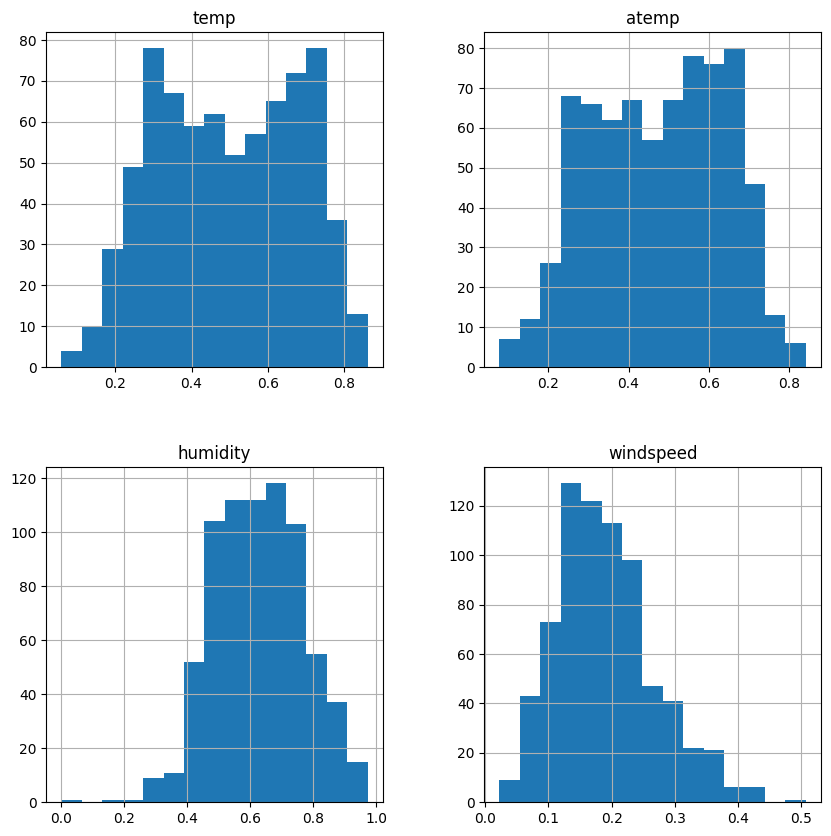

In [ ]:
days_hist_df = days_df[["temp", "atemp", "humidity", "windspeed"]]
days_hist_df.hist(figsize=(10, 10), bins=15)

Berdasarkan pengamatan grafik histogram pada data days_df, diketahui bahwa kolom temp dan kolom atemp memiliki distribusi left-skewed, sementara kolom hum dan kolom windspeed memiliki distribusi right-skewed.

### Explore hours_df

1. Mengecek Penyewa (Casual, Regostered, dan keseluruhan) berdasarkan seasonnya

In [ ]:
hours_df.groupby(by=['season'], observed=True).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max','min','mean']
})

casual  registered count                
             mean        mean   max min        mean
season                                             
Fall    50.287144  185.729093   977   1  236.016237
Spring  14.290901   96.823668   801   1  111.114569
Summer  46.160581  162.183488   957   1  208.344069
Winter  30.666824  168.202032   967   1  198.868856

2.  Mengecek Penyewa Berdasarkan Workingday

In [ ]:
hours_df.groupby(by= ['workingday'], observed=True).agg({
    'count':['max','min','mean', 'sum']
})

count                         
             max min        mean      sum
workingday                               
0            783   1  181.405332  1000269
1            977   1  193.207754  2292410

3. Mengecek Penyewa berdasarkan weekday

In [ ]:
hours_df.groupby(by= ['weekday'], observed=True).agg({
    'count':['max','min','mean', 'sum']
})

count                        
          max min        mean     sum
weekday                              
Fri       957   1  196.135907  487790
Mon       968   1  183.744655  455503
Sat       783   1  190.209793  477807
Sun       776   1  177.468825  444027
Thu       976   1  196.436665  485395
Tue       970   1  191.238891  469109
Wed       977   1  191.130505  473048

4. Mengecek Penyewa berdasarkan month

In [ ]:
hours_df.groupby(by= ['month'], observed=True).agg({
    'count':['max','min','mean', 'sum']
})

count                        
        max min        mean     sum
month                              
Apr     822   1  187.260960  269094
Aug     941   1  238.097627  351194
Dec     759   1  142.303439  211036
Feb     610   1  112.865026  151352
Jan     559   1   94.424773  134933
Jul     913   1  231.819892  344948
Jun     900   1  240.515278  346342
Mar     957   1  155.410726  228920
May     873   1  222.907258  331686
Nov     729   1  177.335421  254831
Oct     963   1  222.158511  322352
Sep     977   1  240.773138  345991

5. Mengecek temp, atemp, humidity, dan windspeed berdasarkan year

In [ ]:
hours_df.groupby(by= ['year'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                   atemp                   humidity                  \
       max   min      mean     max     min      mean      max   min      mean   
year                                                                            
2011  0.96  0.02  0.489069  1.0000  0.0000  0.469000      1.0  0.00  0.643430   
2012  1.00  0.02  0.504825  0.9242  0.0152  0.482481      1.0  0.16  0.611193   

     windspeed                 
           max  min      mean  
year                           
2011    0.8507  0.0  0.191172  
2012    0.8060  0.0  0.189034

6. Mengecek temp, atemp, humidity, dan windspeed berdasarkan month

In [ ]:
hours_df.groupby(by= ['month'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                   atemp                   humidity        \
        max   min      mean     max     min      mean      max   min   
month                                                                  
Apr    0.80  0.24  0.470021  0.6970  0.2273  0.457110     1.00  0.16   
Aug    0.92  0.52  0.708705  0.8485  0.2424  0.651556     0.94  0.25   
Dec    0.60  0.14  0.324167  0.6212  0.1515  0.326296     1.00  0.26   
Feb    0.66  0.06  0.300209  0.6212  0.0455  0.300621     1.00  0.08   
Jan    0.58  0.02  0.237649  0.5455  0.0000  0.240676     1.00  0.21   
Jul    1.00  0.58  0.755470  1.0000  0.5455  0.704094     0.94  0.16   
Jun    0.98  0.46  0.684097  0.9242  0.4545  0.638246     1.00  0.20   
Mar    0.72  0.12  0.390903  0.6515  0.0909  0.382299     1.00  0.00   
May    0.90  0.34  0.594798  0.8333  0.3030  0.565662     1.00  0.21   
Nov    0.64  0.20  0.369200  0.6212  0.1970  0.367339     1.00  0.16   
Oct    0.74  0.22  0.487181  0.6818  0.1970  0.473913     1.00  0.27   
Sep    0.86  0.38  0.616507  0.7879  0.3939  0.579344     1.00  0.28   

                windspeed                 
           mean       max  min      mean  
month                                     
Apr    0.588114    0.7164  0.0  0.234323  
Aug    0.637227    0.8358  0.0  0.171468  
Dec    0.666116    0.6567  0.0  0.176574  
Feb    0.567211    0.8060  0.0  0.215961  
Jan    0.580931    0.6567  0.0  0.207551  
Jul    0.597876    0.8507  0.0  0.166059  
Jun    0.575806    0.5821  0.0  0.185420  
Mar    0.589050    0.6866  0.0  0.222517  
May    0.688958    0.6119  0.0  0.182989  
Nov    0.625045    0.6418  0.0  0.183764  
Oct    0.689490    0.5821  0.0  0.171919  
Sep    0.714454    0.6418  0.0  0.165856

7. Mengecek temp, atemp, humidity, dan windspeed berdasarkan season

In [ ]:
hours_df.groupby(by= ['season'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                   atemp                   humidity        \
         max   min      mean     max     min      mean      max   min   
season                                                                  
Fall    1.00  0.38  0.706410  1.0000  0.2424  0.656004      1.0  0.16   
Spring  0.72  0.02  0.299147  0.6515  0.0000  0.298116      1.0  0.00   
Summer  0.94  0.16  0.544663  0.8788  0.1667  0.520547      1.0  0.16   
Winter  0.76  0.14  0.423138  0.6818  0.1515  0.415738      1.0  0.16   

                 windspeed                 
            mean       max  min      mean  
season                                     
Fall    0.633167    0.8507  0.0  0.171593  
Spring  0.581348    0.8060  0.0  0.215107  
Summer  0.627022    0.7164  0.0  0.203410  
Winter  0.667124    0.6418  0.0  0.170819

In [ ]:
days_df.groupby(by= ['datetime']).agg({
    'count':'sum'
})

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


8. Mengamati grafik histogram (temp, atemp, humidity, windspeed)

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

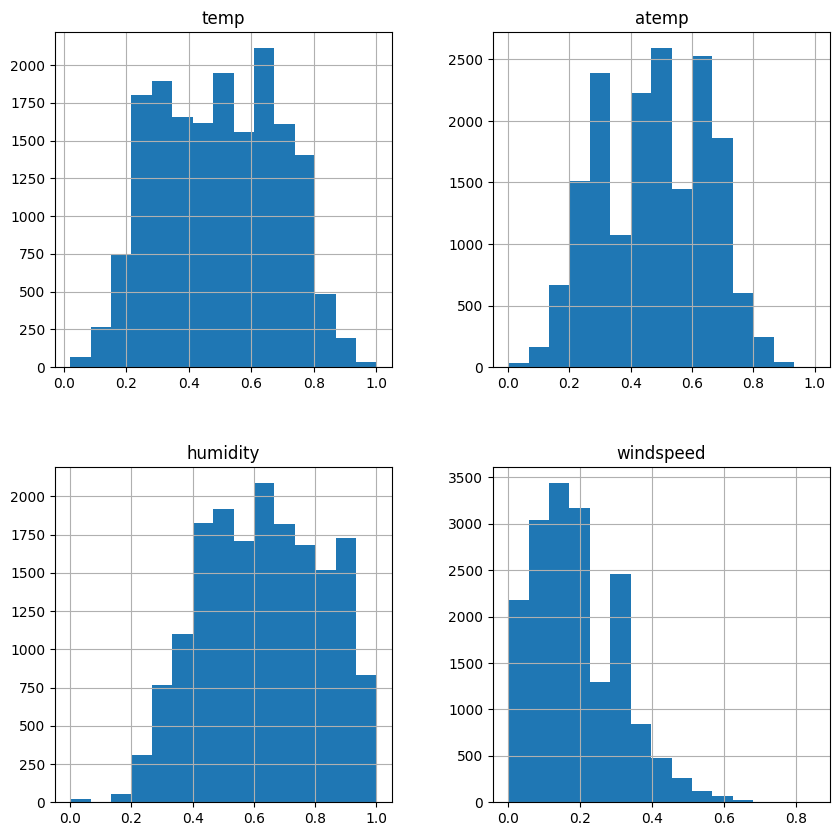

In [ ]:
hours_hist_df = hours_df[["temp", "atemp", "humidity", "windspeed"]]
hours_hist_df.hist(figsize=(10, 10), bins=15)

Berdasarkan pengamatan grafik histogram pada data hours_df, diketahui bahwa kolom temp, kolom atemp dan kolom windspeed memiliki distribusi left-skewed, sementara kolom humidity memiliki distribusi right-skewed.

# Visualization & Explanatory Analysis

## Pertanyaan 1: Pada musim apakah sepeda memiliki jumlah sewa tertinggi?

In [ ]:
bike_byseason_df = days_df.groupby(by="season", observed=True).instant.nunique().reset_index()
bike_byseason_df.rename(columns={
    "instant": "count"
}, inplace=True)
bike_byseason_df.head()

,season,count
0,Fall,188
1,Spring,181
2,Summer,184
3,Winter,178


/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


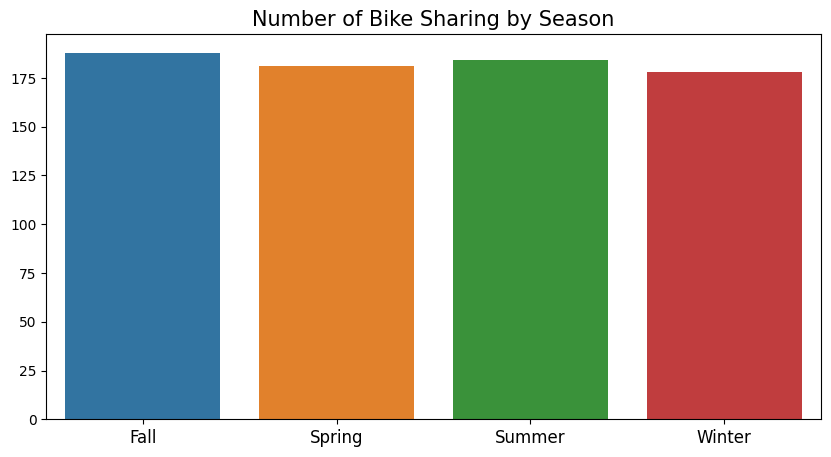

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="season",
    data=bike_byseason_df.sort_values(by="season", ascending=False),
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Penjelasan :
Berdasarkan grafik di atas, fall season memiliki jumlah sewa paling tinggi

## Pertanyaan 2: Bagaimana pengaruh cuaca terhadap pengguna bike sharing?

In [ ]:
bike_byweathercondition_df = days_df.groupby(by="weather_condition", observed=True).instant.nunique().reset_index()
bike_byweathercondition_df.rename(columns={
    "instant": "count"
}, inplace=True)
bike_byweathercondition_df

,weather_condition,count
0,Clear to partly cloudy,463
1,Light rain or snow,21
2,Misty and cloudy,247


/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


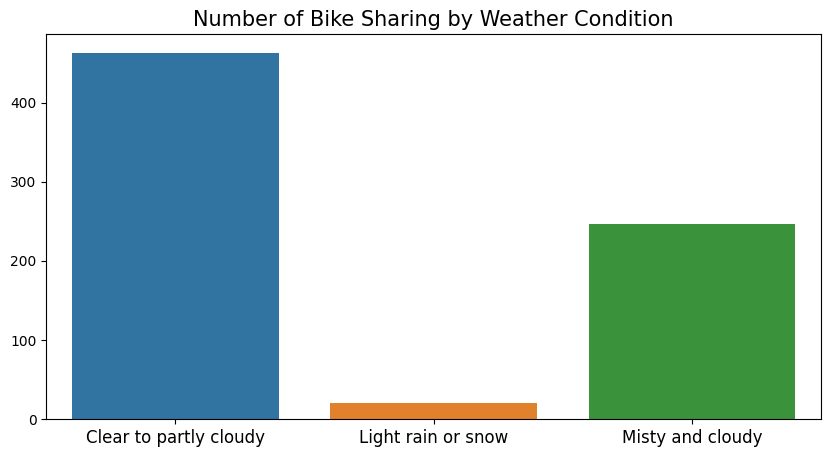

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="weather_condition",
    data=bike_byweathercondition_df,
)
plt.title("Number of Bike Sharing by Weather Condition", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Penjelasan:
Berdasarkan Grafik di atas, cuaca sangat mempengaruhi pada penggunaan bike sharing, pengguna bike sharing paling banyak pada weather condition clear to partly cloudy, dan paling sedikit pada weather condition ligth rain or snow

# Pertanyaan 3: Bagaimana tren penyewaan bike sharing dalam setiap jam, bulan, dan tahun?

### a. Hour

In [ ]:
bike_byhour_df = hours_df.groupby(by='hour', observed=True)['count'].sum().sort_values(ascending=False).reset_index()
bike_byhour_df

,hour,count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


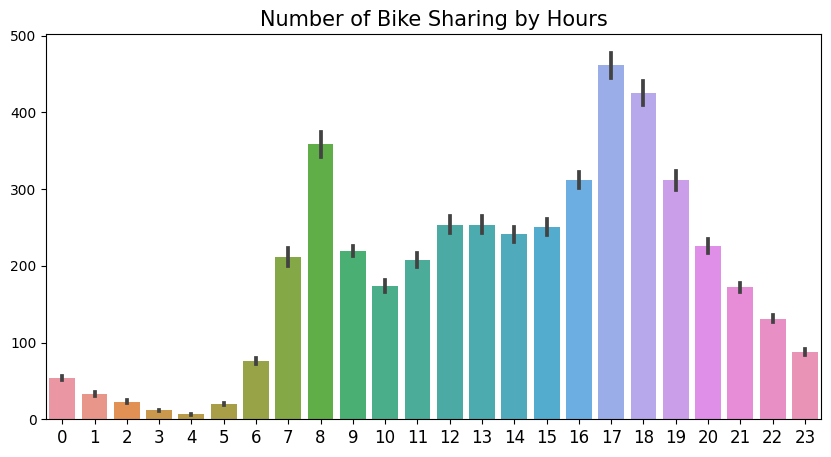

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="hour",
    data=hours_df.sort_values(by="hour", ascending=False),
)
plt.title("Number of Bike Sharing by Hours", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()


### Penjelasan:
Berdasarkan grafik di atas, Penyewaan bike sharing paling banyak terjadi pada pukul 17:00, dan paling sedikit pada pukul 04:00

## b. Month

In [ ]:
bike_byhour_df = days_df.groupby(by='month', observed=True)['count'].sum().sort_values(ascending=False).reset_index()
bike_byhour_df

,month,count
0,Aug,351194
1,Jun,346342
2,Sep,345991
3,Jul,344948
4,May,331686
5,Oct,322352
6,Apr,269094
7,Nov,254831
8,Mar,228920
9,Dec,211036


/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


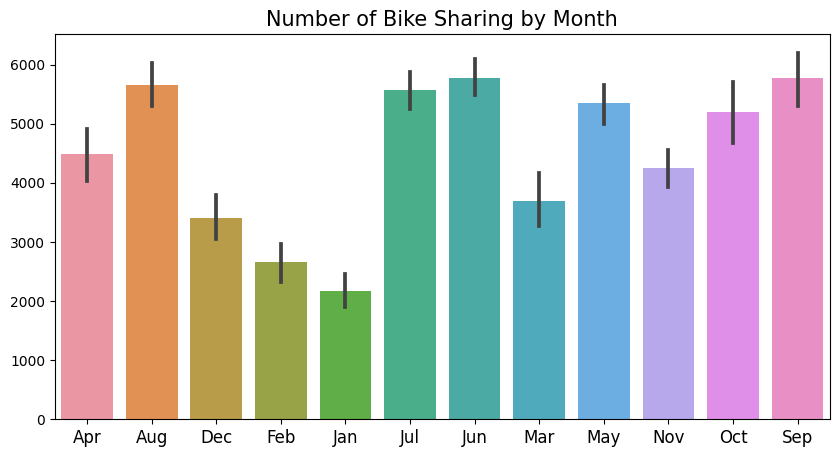

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="month",
    data=days_df.sort_values(by="month", ascending=False),
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()


### Penjelasan:
Berdasarkan grafik di atas, Penyewaan bike sharing paling banyak terjadi pada bulan Agustus, dan paling sedikit pada bulan Januari

### c. Year

In [ ]:
bike_byhour_df = days_df.groupby(by='year', observed=True)['count'].sum().sort_values(ascending=False).reset_index()
bike_byhour_df

,year,count
0,2012,2049576
1,2011,1243103


/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


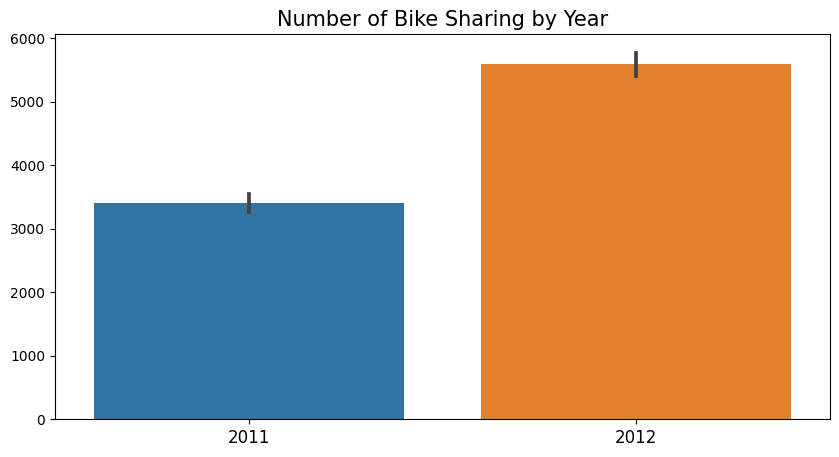

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="year",
    data=days_df.sort_values(by="year", ascending=False),
)
plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()


### Penjelasan :
Berdasarkan grafik di atas, Penyewaan bike sharing paling banyak terjadi pada tahun 2012, dan paling sedikit pada tahun 2011

## Other Visualization

### Unvariate Visualization

/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ahmadikhsanmaulana/.pyenv/versions/3.11.5/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


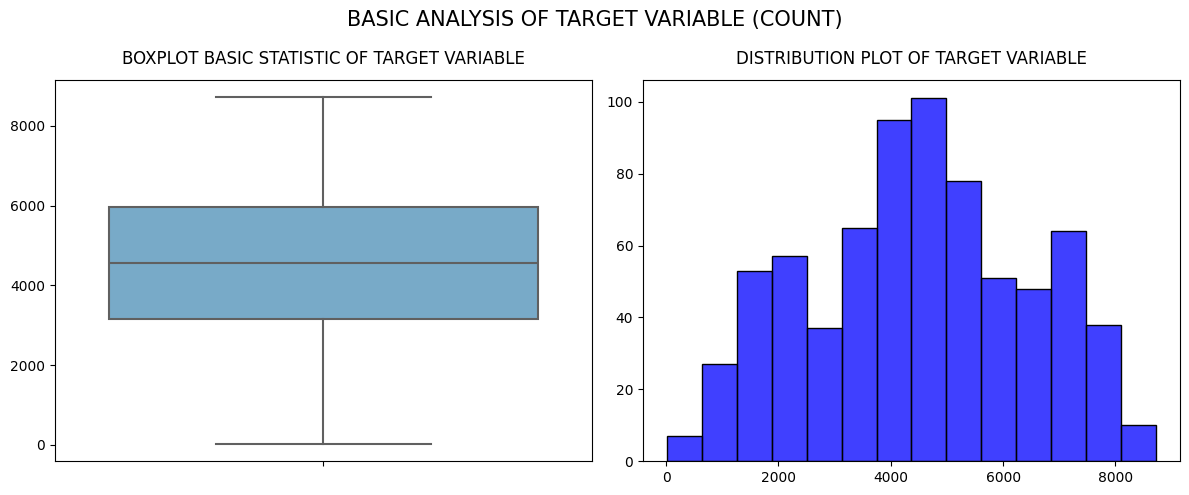

In [ ]:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (12,5))

fig.suptitle('Basic analysis of target variable (Count)'.upper(), fontsize= 15)

# Populate plot 1:
sns.boxplot(y=days_df['count'], ax= ax[0], palette= 'Blues')
ax[0].set_title('Boxplot basic statistic of target variable'.upper(),
                fontsize= 12, fontweight= 20, y= 1.02)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Populate plot 2:
sns.histplot(days_df['count'], ax= ax[1], color= 'Blue')
ax[1].set_title('Distribution plot of target variable'.upper(),
                fontsize= 12, fontweight= 20, y= 1.02)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

### Bivariate Visualization

In [ ]:
var_env = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

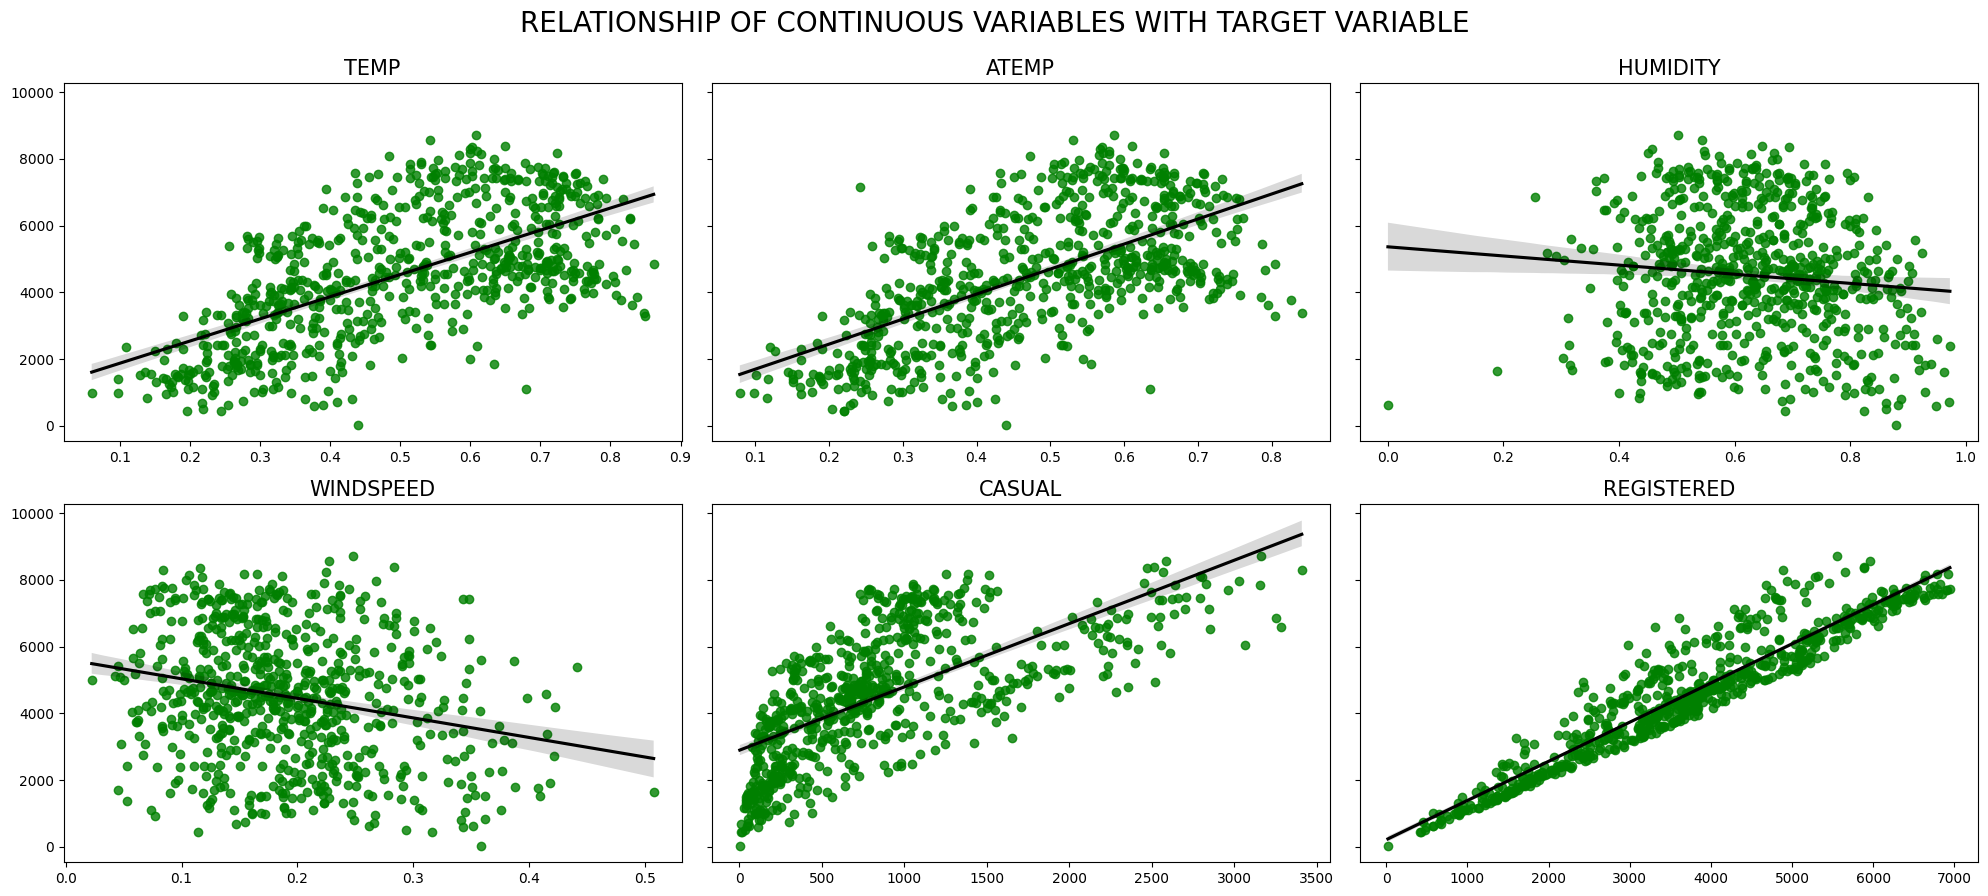

In [ ]:
fig, ax= plt.subplots(nrows= 2, ncols= int(len(var_env)/2), figsize= (20,9), sharey= True)
plt.suptitle('Relationship of continuous variables with target variable'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

k= 0
for i in range(2):
    for j in range(int(len(var_env)/2)):
        sns.regplot(x= days_df[var_env[k]], y= days_df['count'], ax= ax[i,j],
                    scatter_kws= {'color':'green'}, line_kws= {'color':'black'})

        ax[i,j].set_title(f'{var_env[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')

        k+=1

plt.tight_layout()
plt.show()

# Conclusion

* Berdasarkan hasil pengamatan, Penyewaan sepeda paling banyak terjadi pada fall season, berikut urutan dari paling banyak ke sedikit
  1. Fall
  2. Summer
  3. Spring
  4. Winter

* Berdasarkan hasil pengamatan, terlihat bahwa pengguna paling banyak pada cuaca yang cerah, dan paling sedikit ketika hujan. Berikut urutan dari paling banyak ke sedikit
  1. Clear to partly cloudy
  2. Misty and cloudy
  3. Light rain or snow


* Berdasarkan hasil pengamatan, bahwa tren pengguna bike sharing paling banyak pada pukul 17:00 dan paling sedikit pukul 04:00.
  
* Berdasarkan hasil pengamatan, bahwa tren pengguna bike sharing paling banyak pada bulan Agustus dan paling sedikit bulan Januari.
  
* Berdasarkan hasil pengamatan, bahwa tren pengguna bike sharing paling banyak pada tahun 2012 dan paling sedikit tahun 2011.

# Export Datasets

In [ ]:
days_df.to_csv("dashboard\days_clean.csv", index=False)